In [309]:
import pandas as pd
import numpy as np

In [310]:
import warnings
warnings.filterwarnings('ignore')

In [311]:
df = pd.read_csv('Iris.csv')

In [312]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [313]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [314]:
df.shape

(150, 6)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [316]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [317]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [318]:
df.isna().apply(pd.value_counts).T

,False
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [319]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [320]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [321]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [322]:
X = df.drop(['Id','Species'],axis=1)

In [323]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [324]:
y = df[['Species']]

In [325]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [327]:
X_train.shape

(120, 4)

In [328]:
X_test.shape

(30, 4)

In [329]:
y_train.shape

(120, 1)

In [330]:
y_test.shape

(30, 1)

In [331]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [332]:
#import the Pipeline
from sklearn.pipeline import Pipeline

In [333]:
#Create the pipeline
pipe = Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2)),('rf',RandomForestClassifier(criterion='entropy',max_depth=4))])

In [334]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=4))])

In [335]:
pipe_pred = pipe.predict(X_test)

In [336]:
pipe_pred

array([0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [337]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [338]:
accuracy_score(y_test,pipe_pred)*100

93.33333333333333

In [339]:
pipe.score(X_train,y_train)*100

95.83333333333334

In [340]:
#Underfitting - When the test accuracy is higher than the train accuracy the model is underfitting

In [341]:
cf  = confusion_matrix(y_test,pipe_pred)

In [342]:
cf

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

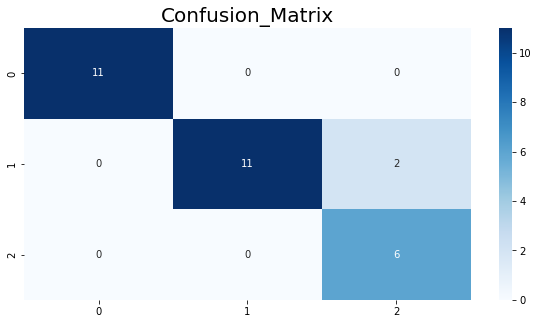

In [344]:
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix',fontsize=20)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

In [345]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

